In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [6]:
import pandas as pd
df = pd.read_csv('USCensus1990.data.csv')

In [52]:
print(len(df))

NameError: name 'item' is not defined

In [7]:
#dAge, dHispanic, iYearwrk and iSex
dAge = df.pop("dAge")
dHispanic = df.pop('dHispanic')
iYearwrk = df.pop('iYearwrk')
iSex = df.pop('iSex')
df.pop('caseid')

0            10000
1            10001
2            10002
3            10003
4            10004
            ...   
2458280    2468280
2458281    2468281
2458282    2468282
2458283    2468283
2458284    2468284
Name: caseid, Length: 2458285, dtype: int64

In [ ]:
irregularities = [dAge, dHispanic, iYearwrk, iSex]
externalVars = pd.concat(irregularities)
externalVars.to_csv('USCensus1990externalVars.data.csv')

In [ ]:
df.to_csv('USCensus1990Removed.data.csv')

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)


In [7]:
train.to_csv('USCensus1990train.data.csv')

In [8]:
test.to_csv('USCensus1990test.data.csv')

In [13]:
#dAge, dHispanic, iYearwrk and iSex
#dAge = test.pop('dAge')
#dHispanic = test.pop('dHispanic')
#iYearwrk = train.pop('iYearwrk')
#iSex = test.pop('iSex')
#irregularities = [dAge, dHispanic, iYearwrk, iSex]
#externalVars = pd.concat(irregularities)
#externalVars.to_csv('USCensus1990trainExternalVars.data.csv')

In [5]:
df.describe().astype(float)

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,...,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06
mean,1.239142e+06,3.851643e+00,3.299006e+00,1.574252e+00,1.207488e-01,2.880964e-01,1.236083e+00,1.394556e+00,1.432078e+00,1.464860e+00,...,7.939100e-01,1.483541e+00,3.402331e-02,8.310208e-01,1.000718e+00,1.095047e+00,3.844509e-02,8.446546e+00,1.820591e+00,1.391918e-01
std,7.096459e+05,2.048492e+00,4.041179e+00,1.696150e+00,6.709576e-01,9.667118e-01,1.759400e+00,1.760919e+00,8.442641e-01,8.462626e-01,...,1.308956e+00,1.966293e+00,1.812891e-01,8.594720e-01,6.841873e-01,7.437089e-01,1.922683e-01,4.080579e+00,2.108889e+00,4.035386e-01
min,1.000000e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.245710e+05,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
50%,1.239142e+06,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00
75%,1.853713e+06,6.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,...,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.100000e+01,2.000000e+00,0.000000e+00
max,2.468284e+06,7.000000e+00,1.100000e+01,1.200000e+01,4.000000e+00,4.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,...,3.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.700000e+01,7.000000e+00,2.000000e+00


In [6]:
print("Printing descriptions:")
for i in df:
    print(i)
    print(df[i].describe()['mean'])

#thingyArr = []
#df.shape
#df.info()
#df.isnull().sum()
#df.skew()
#df.kurt()
#print(sns.distplot(df['dAge']))
#for i in df[:1]:
    #thingyArr.append(sns.distplot(df[i]))

Printing descriptions:
caseid
1239142.0
dAge
3.8516429136572854
dAncstry1
3.2990064211431953
dAncstry2
1.5742523751314432
iAvail
0.12074881472245895
iCitizen
0.2880963761321409
iClass
1.2360832857052784
dDepart
1.3945563675489212
iDisabl1
1.4320780544159852
iDisabl2
1.4648598514818258
iEnglish
0.21087140018346123
iFeb55
0.018674807843679638
iFertil
1.1815355013759592
dHispanic
0.1397083739273518
dHour89
1.5799376394518942
dHours
1.3955696756071814
iImmigr
0.45039000766794735
dIncome1
0.8968768877489794
dIncome2
0.049532906070695625
dIncome3
0.010825026390349369
dIncome4
0.19792456936441463
dIncome5
0.13957535436289933
dIncome6
0.033132854815450606
dIncome7
0.06632510062909712
dIncome8
0.041534647121875615
dIndustry
3.9211100421635408
iKorean
0.02050453873330391
iLang1
1.7269860898960048
iLooking
0.5351071987178053
iMarital
1.8980089778036313
iMay75880
0.01045037495652457
iMeans
0.8574453328234928
iMilitary
2.8108909259910875
iMobility
1.3429561665958178
iMobillim
1.5208753256843695
dOc

In [20]:
distributionArr = []
histArr = []
for i in df:
    distributionArr.append(sns.distplot(df[i]))
    histArr.append(sns.histplot(df[i]))
#sns_plot = sns.distplot(df['iClass'])
#sns.distplot(df['iClass']).figure()

c:\users\ron zamir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ron zamir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EE88DDEDC0> (for post_execute):


KeyboardInterrupt: 

In [82]:
listOfDict = []
#df.pop('caseid')
#train.pop('caseid')
keys = df.keys()
#print(keys)
for i in train:
    listOfDict.append({})
for i in range(0, int(len(train) / 1000)):
    b = df.iloc[[i]].values
    print(df.iloc[[i]])
    #print(b[0][0])
    for j in range(0, len(b)):
        if (b[0][j] not in listOfDict[j].keys()):
            listOfDict[j][b[0][j]] = 1
        else:
            listOfDict[j][b[0][j]] = listOfDict[j][df[j]] + 1

   dAge  dAncstry1  dAncstry2  iAvail  iCitizen  iClass  dDepart  iDisabl1  \
0     5          0          1       0         0       5        3         2   

   iDisabl2  iEnglish  ...  iTmpabsnt  dTravtime  iVietnam  dWeek89  iWork89  \
0         2         1  ...          0          5         0        2        1   

   iWorklwk  iWWII  iYearsch  iYearwrk  dYrsserv  
0         1      0        11         1         0  

[1 rows x 68 columns]
   dAge  dAncstry1  dAncstry2  iAvail  iCitizen  iClass  dDepart  iDisabl1  \
1     6          1          1       0         0       7        5         2   

   iDisabl2  iEnglish  ...  iTmpabsnt  dTravtime  iVietnam  dWeek89  iWork89  \
1         2         0  ...          0          1         0        2        1   

   iWorklwk  iWWII  iYearsch  iYearwrk  dYrsserv  
1         1      0         5         1         0  

[1 rows x 68 columns]
   dAge  dAncstry1  dAncstry2  iAvail  iCitizen  iClass  dDepart  iDisabl1  \
2     3          1          2       

KeyError: 0

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets
import dunnsklearn
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#print(df.head())
#k_means=KMeans(n_clusters=4)
#k_means.fit(df)
#k_means.fit(df).figure()
for i in range(27, 40):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df)
    labels = k_means.labels_
    print(davies_bouldin_score(df, labels))
    

1.5208782729369466
1.5765104552467615
1.5512961013163773
1.4908574308088698
1.5243595721516823
1.4484449312428547
1.5685312687694632


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

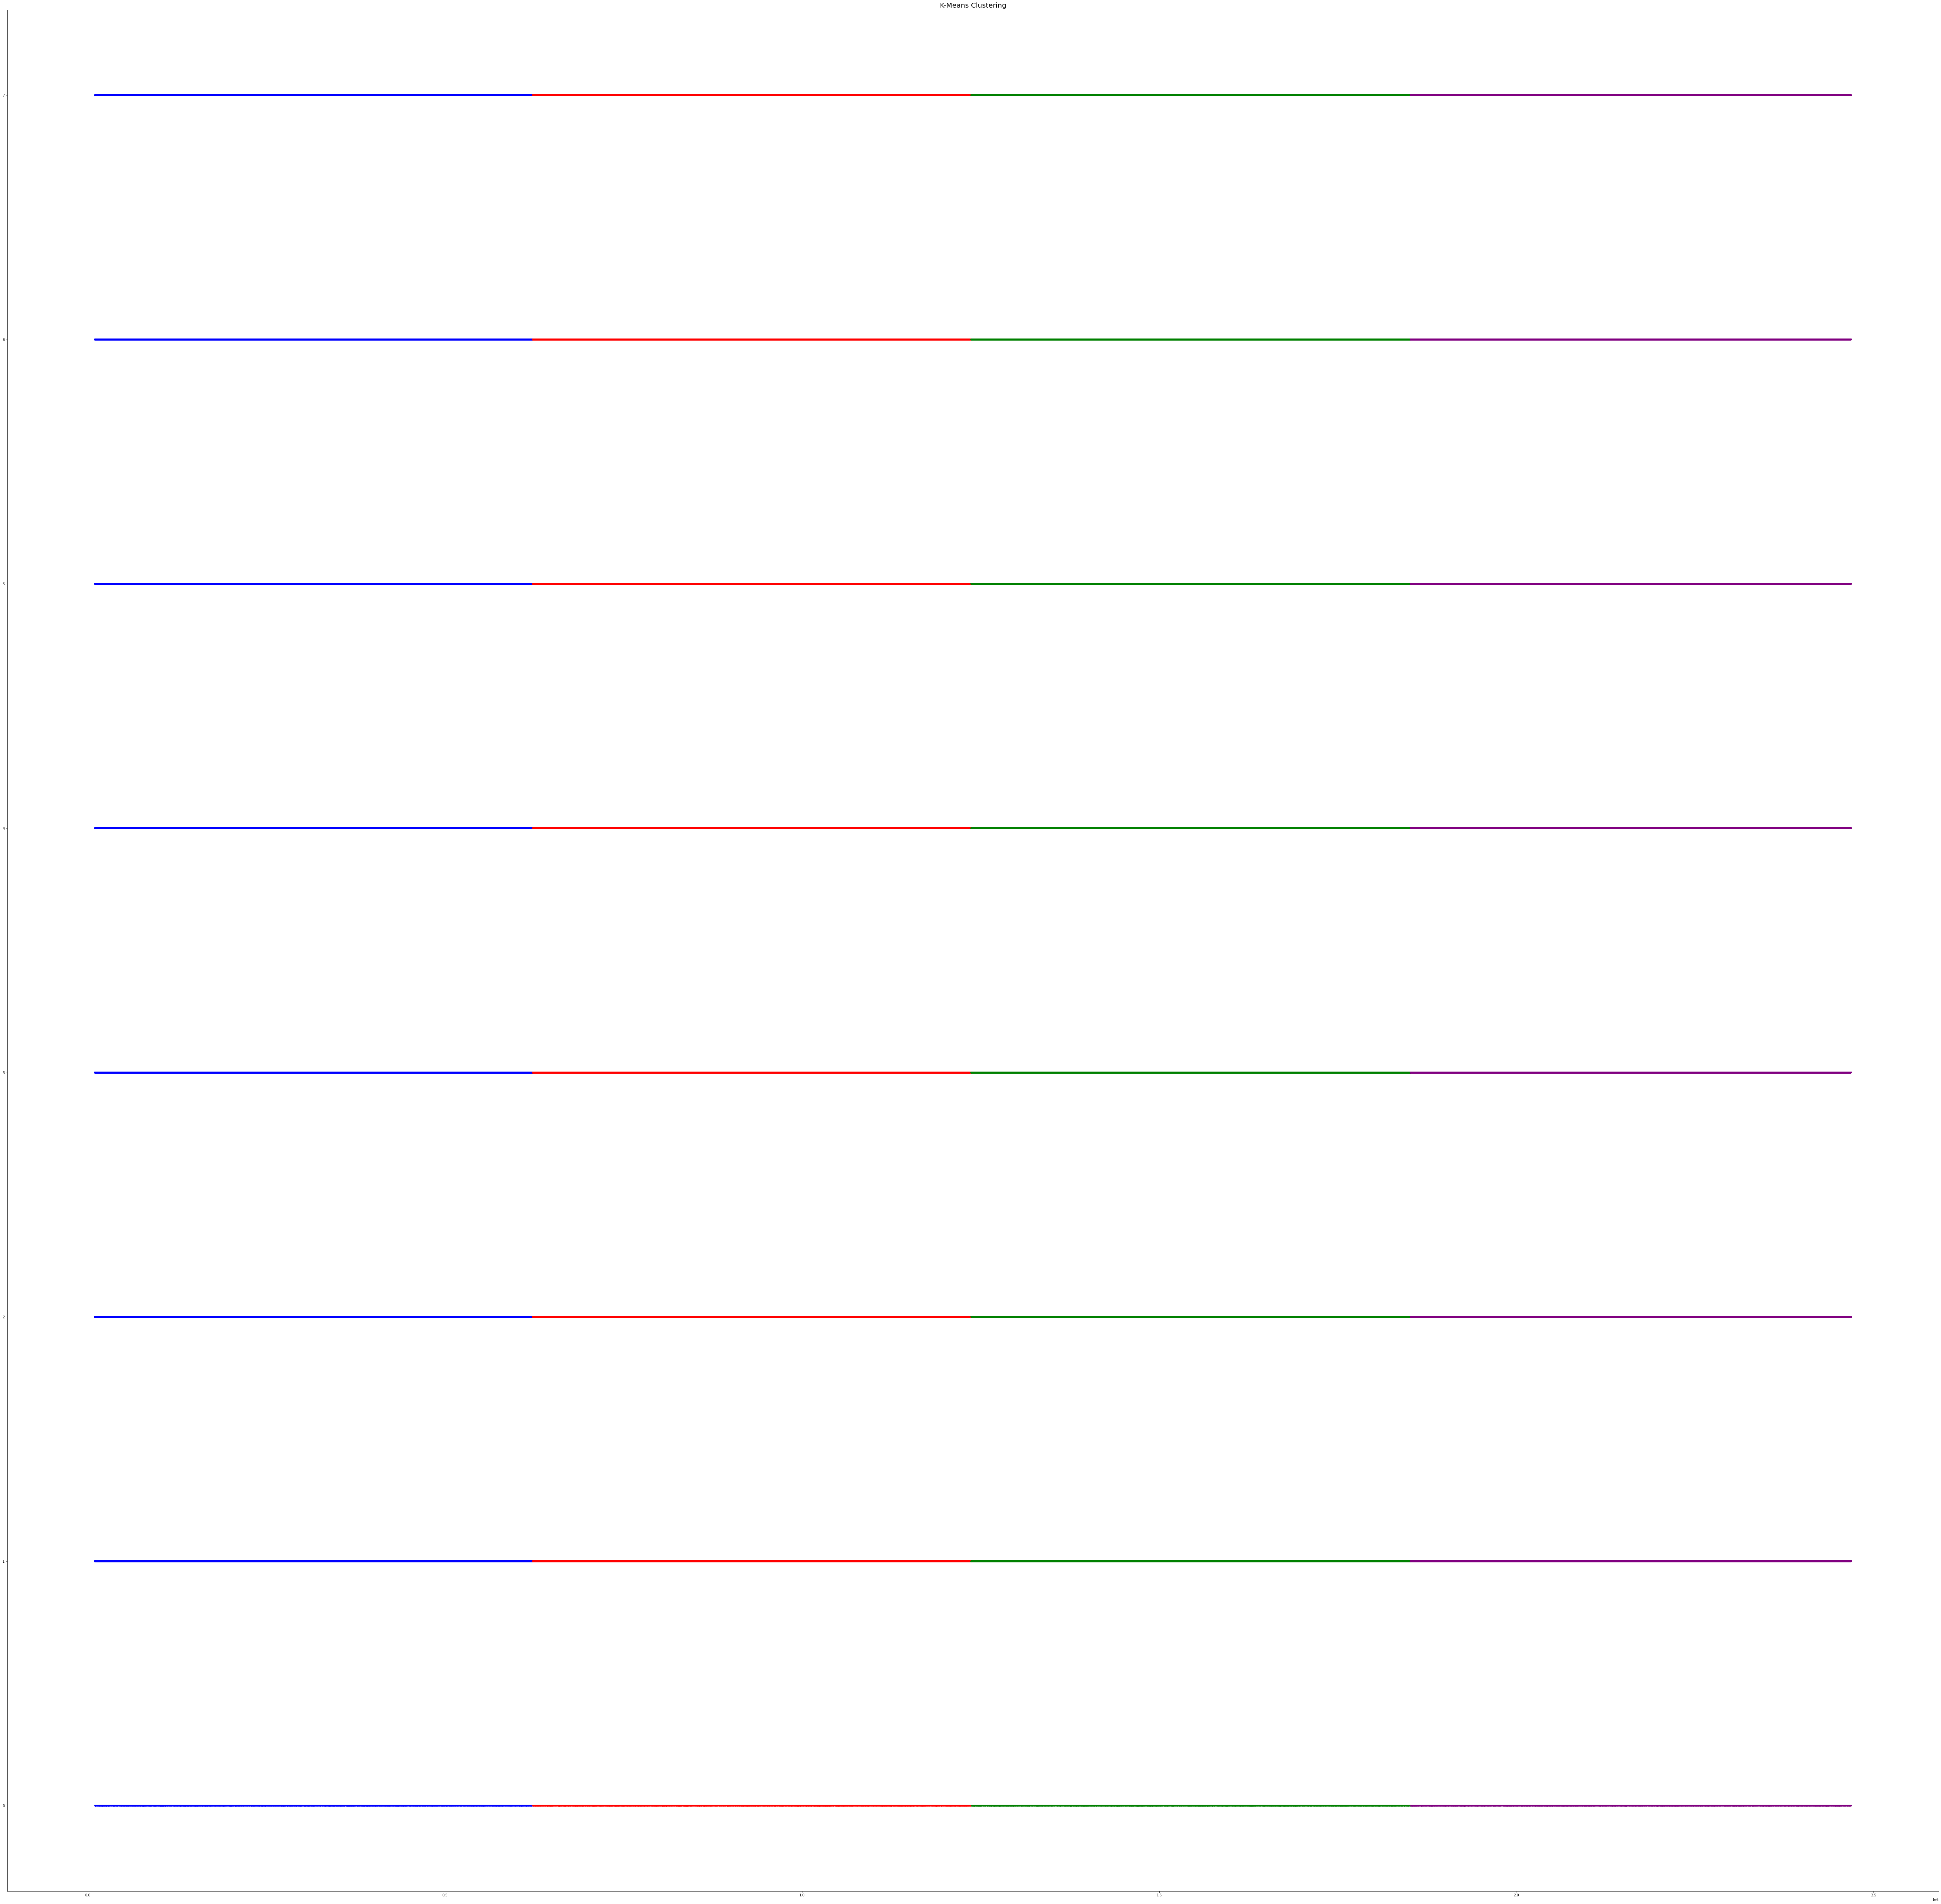

In [42]:
colors=['purple','red','blue','green']
plt.figure(figsize=(100,100))
plt.scatter(df[keys[0]], df[keys[1]],c=k_means.labels_,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.show()
#plt.savefig("test.svg", format="svg")

In [96]:
dfs = df.sample(n=100000)


In [101]:
from sklearn.cluster import DBSCAN
print("STarting")
outlier_detection = DBSCAN(
 eps = 13.892443989449804, 
 min_samples = 2 * 64)
print("Continuing")
clusters = outlier_detection.fit(dfs)

STarting
Continuing


In [102]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
db = clusters
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#    "Adjusted Mutual Information: %0.3f"
#    % metrics.adjusted_mutual_info_score(labels_true, labels)
#)

[0 1 0 ... 0 0 0]
Estimated number of clusters: 3
Estimated number of noise points: 51


In [103]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(dfs, labels))


Silhouette Coefficient: 0.809


In [ ]:
import matplotlib.pyplot as plt
x = df
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [97]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(dfs) # fitting the data to the object
distances,indices=nbrs.kneighbors(dfs) # finding the nearest neighbours
maxes = 0
for i in range(len(distances) - 1):
    if (maxes < distances[i+1][1] - distances[i][1]):
        maxes = distances[i+1][1] - distances[i][1]
print(maxes)

13.892443989449804


In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
